<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/ChaosControlandSynchronization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaos, Chaos Control, and Chaos Synchronization - I

##Introduction to Chaotic Dynamics
## Juan C. Reyes - Dalhousie University 
### Dec. 12, 2019.

### The following notebook is based from Stephen Lynch's Book: Dynamical Systems with Applications using Python.
### Chapter 14: Nonlinear Discrete Dynamical Systems

The aim of these exercise is to give a quick overview of chaotic dynamics and then see how the new and exciting field of chaos control and synchronization is being applied to a broad range of physical systems in biochemistry, cardiology, communications, cryptography, finance, and many more.


In practise, we cannot escape chaos, it is everywhere around us. It naturaly arises even in simple models in cardiology, chemical reactions, electronic circuits, population dynamics, and weather forecasting. Many scientists have tried to remove chaotic behaviour from their models and the maxim "stability good, chaos bad" came to be. However since the 1990's through developments in control theory and nonlinear dynamics scientists came to realize the potential uses for chaotic behaviour replacing the maxim with "stability good, chaos better."



# Chaos Theory

Chaos theory is an interdisciplinary theory that states that within the apparent randomness of many physical systems there are actually underlying patterns, repetition, fractals, and self-organization. The theory is often associated with the metaphor of *the buttlerfly effect* of how a butterfly flapping its wings in Mexico can cause a hurricane in Nova Scotia. Mathematically, the smallest change in a deterministic nonlinear system results in drastic differences in the system's long term behaviour. We call this *sensitivity to initial conditions*. This sensitivity to initial conditions which may arise from rounding errors in our computational models can yield diverging outcomes therefore making any long-term prediction of behaviour of a physical system impossible.

There is no universally accepted definition of chaos, but the following characteristics are often good indicators of chaotic behaviour:

* Long-term aperiodic (nonperiodic) behavior;
* Sensitivity to initial conditions;
* Fractal Structure.

We will actually observe all three of these behaviours in the next section.

# Introduction to Chaos: The Logistic Equation 
<h1><center>$ x_{n+1} = rx_{n}(1-x_{n})$</center></h1>

The logistic equation represents a very basic *demographic* model that takes into account two counteracting processes that determine the size of a population: the reproduction rate  $r$, and starvation due to a limited food supply.You might remember seeing this equation in the [Interacting Species ](https://colab.research.google.com/drive/1t5VXMG57VN21XRX3MojbQBMoWiU_bX3B)exercise! This equation is [*the*](https://www.businessinsider.com/17-equations-that-changed-the-world-2014-3#16-chaos-theory-16)       archetypal example of chaos theory and can illustrate how complex dynamical behaviour in systems may arise out of a very simple non-linear dynamical equation (note that this is just a parabola that most students learn in highschool). This equation was popularized in 1976 by a biologist known as Robert May. Let's take a look at it together.




We define the population size of a species to be the variable $x$. If there are no animals in the population then $x=0$, and if the population reaches its maximum size (due to limited food supply) then $x=1$.
The index $n$ represents the *population at the present time n* and the index $n+1$ represents the population at the next instant of time or *time step* to be *n+1*.
Remember that we build these mathematical models with the aim of prediction in mind. If we know the present population $x_{n}$ and the reproduction rate $r$, we can *determine* the population at the next time step $x_{n+1}$.

Precisely, on the right hand side of the equation we see $x_{n}$, which represents the *current* size of the population being multiplied by $r$ which represents the rate of reproduction of a particular species. This product of $r*x_{n}$ represents the new number of offspring. It seems reasonable to expect that a higher reproduction rate $r$ yields a larger population in the next time step. 

The $(1-x_{n})$ expression describes the starvation of the species due to a lack of food. This expression will always be a fraction, and thus when multiplied by the number of new offspring $r*x_{n}$,  it describes how many of the species which reproduced manage to survive.

Here is a quick example of a species that has a very high initial population but a low reproduction rate:

Assume a reproduction rate of $r=1$ and an initial population at 90% of its carrying capacity $x_{(n=0)}=0.9$ .
Inputting this information into our logistic equation yields the population at the next time step $x_{(n=1)}$:

$ x_{n+1} = rx_{n}(1-x_{n})$

$x_{(n=1)} = 1*0.9*(1-0.9)$

$x_{(n=1)} = 1*0.9*0.1$

$x_{(n=1)} = 0.09$

Meaning that our population plummeted from $x_{(n=0)}=0.9$ (90%) to $x_{(n=1)} = 0.09$ (9%) in a single time step.

If we apply our newly calculated population value $x_{(n=1)}$ we can perform this calculation again for the next time step $x_{(n=2)}$ yielding:

$x_{(n=2)} = 1*0.09*(1-0.09)$

$x_{(n=2)} = 1*0.09*0.91$

$x_{(n=2)} = 0.0819$

This new population value of $x_{(n=2)}=0.0819$ decreased yet again from our previous time step $x_{(n=1)}=0.09$. 

We could keep performing these calculations by hand indefinetely to get more information on our system (and in fact, this is precisely the advantage of having computers!) but we can guess through intuition what is going to happen.
The initial population $x_{(n=0)}=0.9$ given the reproduction rate $r=1$ is ***unstable***, and without any external stimulus, the *long term behaviour* of the population $x$ will seek to ***stabilize*** towards $0$.

As we will see, by simply *varying* the value of the reproduction rate parameter $r$ we will notice a broad range of dynamic behaviour such as *(in)stability*, *periodicity*, *quasiperiodicity*, and *chaos*.

Finally, let's code the logistic equation and explore the broad range of behaviour hidden in this equation by simply changing the parameter value $r$.




# The Road to Chaos

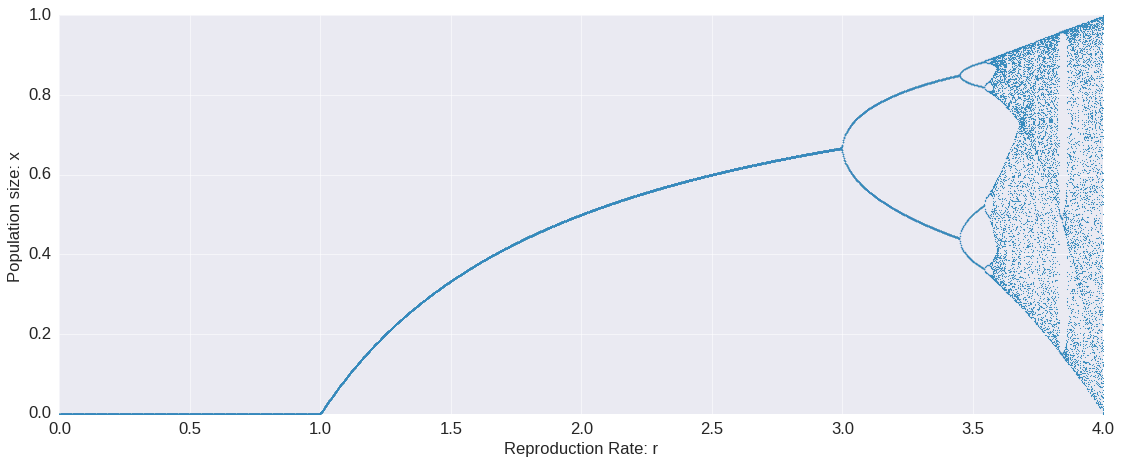

In [0]:
#@title <h1><center>Bifurcation Diagram for the Logistic Equation</center></h1>
import numpy as np
#Plot Styles
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-darkgrid')

def f(x, r):
    return r * x * (1 - x)

ys = []
rs = np.linspace(0, 4, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Zoomed In Figure
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(ys[:, 0], ys[:, 1],'.', markersize=2)
#Vertical Lines, will come in handy in a bit
#plt.axvline(x=3.25,color='r')
#plt.axvline(x=.5, ymin=0, ymax=1,linewidth=1.5,color='r')

plt.xlabel('Reproduction Rate: r', fontsize=15)
plt.ylabel('Population size: x ', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()



As we will see, the graph above will be handy when it comes to understanding the broad range of dynamical behaviour hidden in the logistic equation.

Recall that our population values lie in the range $x:[0,1]$ and our parameter values lie in the range $r: [0,4]$.

In the example we saw above, we used values of $r=1$ and $x_{(n=0)}=0.9$. Lets see what these computations look like in Python and let's generate some graphs to analyze their behaviour in closer depth.

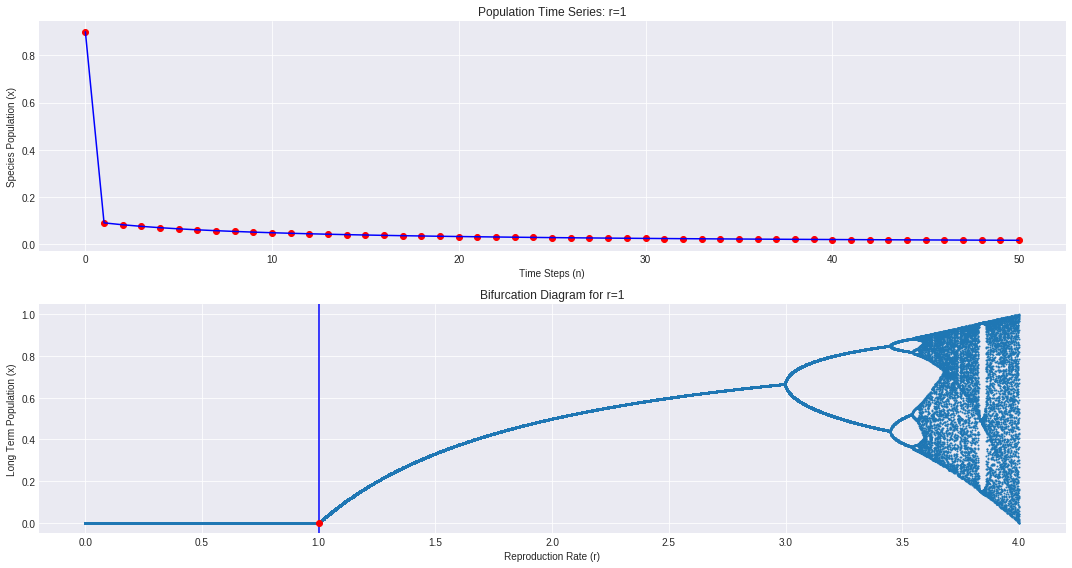

In [0]:
# Import necessary packages for computing and graphing the
# Logistic time series and bifurcation diagram
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-darkgrid')

# Logistic Equation System Parameters #
# Control parameter of the logistic equation: r-Species Reproduction Rate 
rlogistic = 1

# Set up the initital population
xlogistic = [0.9]
# The number of iterations to generate (time steps)
N = 50

# The main loop that calculates the logistic equation,
# iterates and stores population values for the total number of 
# time steps N.
for n in range(0,N):
  # At each iteration calculate the next population value x_(n+1)
  # and store it in the list x
  logisticgrowth = rlogistic*xlogistic[n]*(1.0-xlogistic[n])
  xlogistic.append(logisticgrowth)
    

# Let's define the logistic equation as a function and use it
# to create the bifurcation diagram we saw above    
def f(x, r):
    return r * x * (1 - x)

# Create an array that stores the Long Term behaviour of our logistic equation
ys = []
# Our parameter range r:[0,4]
rs = np.linspace(0, 4, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Zoomed In Figure

# Given an initial condition, and for each value of r,
# Iterate through the map 550 times, only storing the last 50 values
# to solely focus on the end behaviour of the system
for r in rs:
    x = 0.9
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

## Generate Graphs ##
fig, axs = plt.subplots(2,1,figsize=(15, 8))

## Time Series Graph ##
axs[0].plot(xlogistic, 'ro', xlogistic , 'b')
axs[0].set_title("Population Time Series: r=" + str(rlogistic))
axs[0].set(xlabel="Time Steps (n)", ylabel="Species Population (x)")

## Bifurcation Diagram ## 
axs[1].plot(ys[:, 0], ys[:, 1],'.', markersize=2)
# Draw a vertical line at the given value of r ##
axs[1].axvline(x=rlogistic, ymin=0, ymax=1,linewidth=1.5,color='b')
# Circle marking intersection
axs[1].plot(1.0,0, marker="o",color='r')

axs[1].set_title("Bifurcation Diagram for r=" + str(rlogistic))
axs[1].set(xlabel="Reproduction Rate (r)", ylabel="Long Term Population (x)")
    
plt.tight_layout()
    
    


With the time series generated from the data we can observe the long term behaviour of the species quickly tending towards zero as our initial calculations hinted. The bifurcation diagram is useful for quickly picking out the long term behaviour of the species for any given parameter value $r$. As we can see from the graph, any species with a reproduction rate in the range $0<r<1$ will inevitably die off. Let's see what happens for a larger reproduction rate such as $r=2.5$:

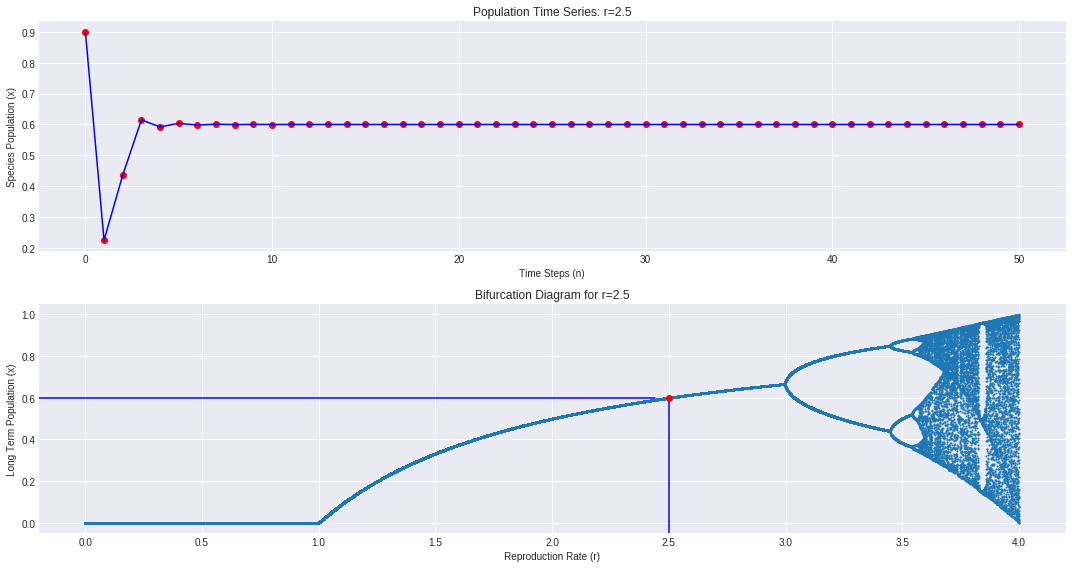

In [0]:
#@title Reproduction Rate: r=2.5
# Import necessary packages for computing and graphing the
# Logistic time series and bifurcation diagram
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-darkgrid')

# Logistic Equation System Parameters #
# Control parameter of the logistic equation: r-Species Reproduction Rate 
rlogistic = 2.5

# Set up the initital population
xlogistic = [0.9]
# The number of iterations to generate (time steps)
N = 50

# The main loop that calculates the logistic equation,
# iterates and stores population values for the total number of 
# time steps N.
for n in range(0,N):
  # At each iteration calculate the next population value x_(n+1)
  # and store it in the list x
  logisticgrowth = rlogistic*xlogistic[n]*(1.0-xlogistic[n])
  xlogistic.append(logisticgrowth)
    

# Let's define the logistic equation as a function and use it
# to create the bifurcation diagram we saw above    
def f(x, r):
    return r * x * (1 - x)

# Create an array that stores the Long Term behaviour of our logistic equation
ys = []
# Our parameter range r:[0,4]
rs = np.linspace(0, 4, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Zoomed In Figure

# Given an initial condition, and for each value of r,
# Iterate through the map 550 times, only storing the last 50 values
# to solely focus on the end behaviour of the system
for r in rs:
    x = 0.9
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

## Generate Graphs ##
fig, axs = plt.subplots(2,1,figsize=(15, 8))

## Time Series Graph ##
axs[0].plot(xlogistic, 'ro', xlogistic , 'b')
axs[0].set_title("Population Time Series: r=" + str(rlogistic))
axs[0].set(xlabel="Time Steps (n)", ylabel="Species Population (x)")

## Bifurcation Diagram ## 
axs[1].plot(ys[:, 0], ys[:, 1],'.', markersize=2)
# Draw a vertical line at the given value of r ##
axs[1].axvline(x=rlogistic, ymin=0, ymax=0.6,linewidth=1.5,color='b')
# Draw a horizontal line that points to the long term species
axs[1].axhline(y=0.6,xmin=0,xmax=0.6,linewidth=1.5,color='b')
# circle marking intersection
axs[1].plot(2.5,0.6, marker="o",color='r')

axs[1].set_title("Bifurcation Diagram for r=" + str(rlogistic))
axs[1].set(xlabel="Reproduction Rate (r)", ylabel="Long Term Population (x)")
    
plt.tight_layout()
    
    


With a larger reproduction rate the population initially decays but quickly rises to 60 percent of its maximal size as seen in the time series. The population then stabilizes and remains constant in the long term. This is what is called a *fixed point* in the species dynamics. We can see this same result in the bifurcation diagram where the lines intersect. Let's keep exploring what happens as we investigate a species with a larger reproduction rate such as $r=3.2$

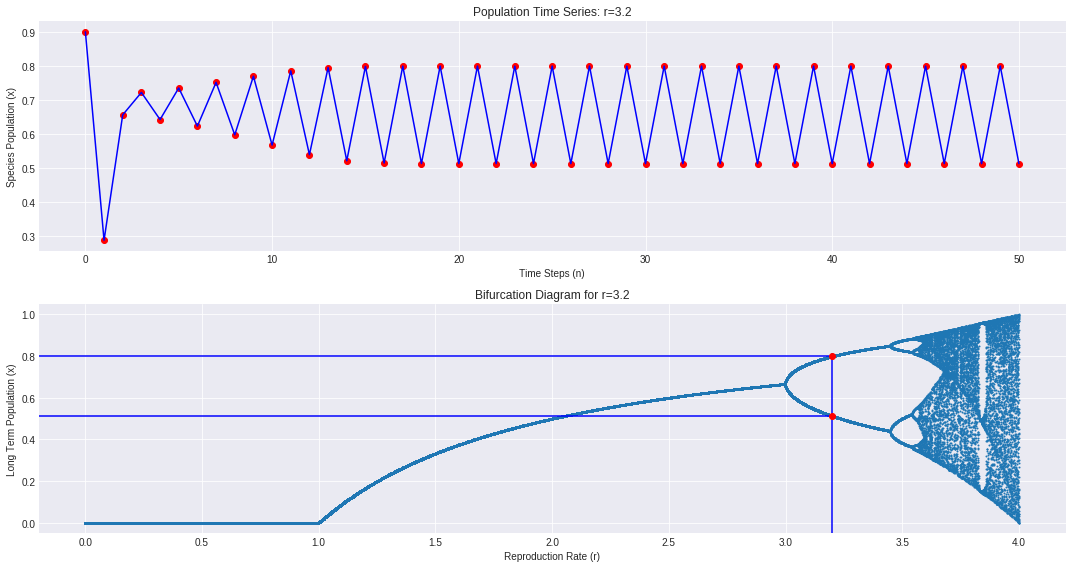

In [0]:
#@title Reproduction Rate: r=3.2
# Import necessary packages for computing and graphing the
# Logistic time series and bifurcation diagram
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-darkgrid')

# Logistic Equation System Parameters #
# Control parameter of the logistic equation: r-Species Reproduction Rate 
rlogistic = 3.2

# Set up the initital population
xlogistic = [0.9]
# The number of iterations to generate (time steps)
N = 50

# The main loop that calculates the logistic equation,
# iterates and stores population values for the total number of 
# time steps N.
for n in range(0,N):
  # At each iteration calculate the next population value x_(n+1)
  # and store it in the list x
  logisticgrowth = rlogistic*xlogistic[n]*(1.0-xlogistic[n])
  xlogistic.append(logisticgrowth)
    

# Let's define the logistic equation as a function and use it
# to create the bifurcation diagram we saw above    
def f(x, r):
    return r * x * (1 - x)

# Create an array that stores the Long Term behaviour of our logistic equation
ys = []
# Our parameter range r:[0,4]
rs = np.linspace(0, 4, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Zoomed In Figure

# Given an initial condition, and for each value of r,
# Iterate through the map 550 times, only storing the last 50 values
# to solely focus on the end behaviour of the system
for r in rs:
    x = 0.9
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

## Generate Graphs ##
fig, axs = plt.subplots(2,1,figsize=(15, 8))

## Time Series Graph ##
axs[0].plot(xlogistic, 'ro', xlogistic , 'b')
axs[0].set_title("Population Time Series: r=" + str(rlogistic))
axs[0].set(xlabel="Time Steps (n)", ylabel="Species Population (x)")

## Bifurcation Diagram ## 
axs[1].plot(ys[:, 0], ys[:, 1],'.', markersize=2)
# Draw a vertical line at the given value of r ##
axs[1].axvline(x=rlogistic, ymin=0, ymax=0.78,linewidth=1.5,color='b')
# Draw a horizontal line that points to the long term species
axs[1].axhline(y=0.8,xmin=0,xmax=0.77,linewidth=1.5,color='b')
axs[1].axhline(y=0.512,xmin=0,xmax=0.77,linewidth=1.5,color='b')
# circles marking intersections
axs[1].plot(rlogistic,0.8, marker="o",color='r')
axs[1].plot(rlogistic,0.512, marker="o",color='r')

axs[1].set_title("Bifurcation Diagram for r=" + str(rlogistic))
axs[1].set(xlabel="Reproduction Rate (r)", ylabel="Long Term Population (x)")
    
plt.tight_layout()
    
    


Now with a larger reproduction rate the population of the species reveals a different type of behaviour. We begin to observe oscillatory dynamics where the population cycles repeatedly between two population sizes. This is generally due to species dying off to a lack of food but then the population re-adjusting and growing back to large numbers once again. In our bifurcation diagram we now observe two intersection points for our given parameter value representing two possible long term population sizes. This known as a *period-doubling bifurcation*. 

In a similar fashion, we will now see what happens when our parameter value is increased to $r=3.5$. The period doubles yet again, and we obtain a population size oscillating between four possible fixed sizes.

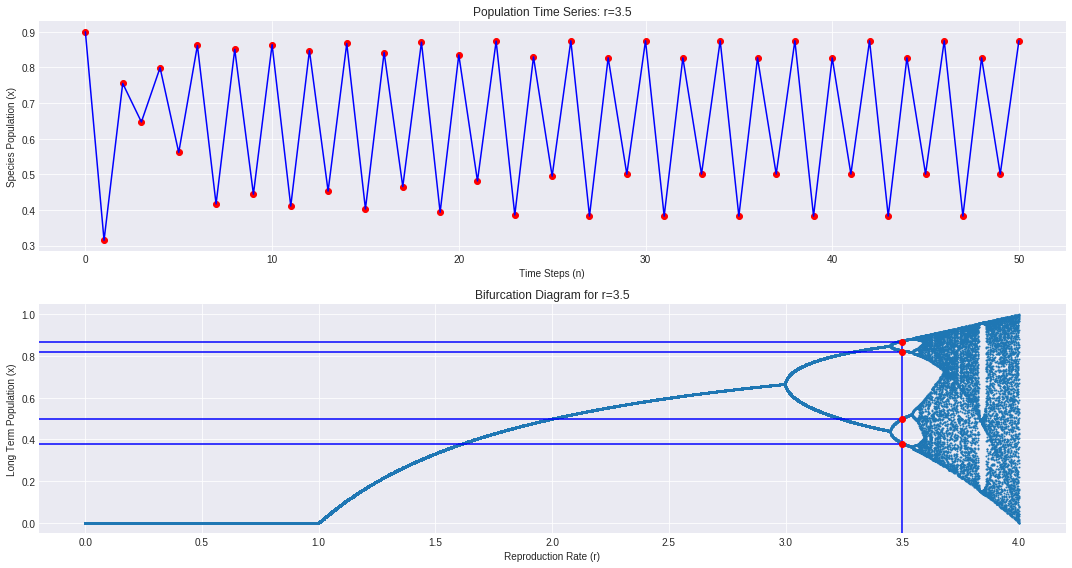

In [2]:
#@title Reproduction Rate: r=3.5
# Import necessary packages for computing and graphing the
# Logistic time series and bifurcation diagram
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-darkgrid')

# Logistic Equation System Parameters #
# Control parameter of the logistic equation: r-Species Reproduction Rate 
rlogistic = 3.5

# Set up the initital population
xlogistic = [0.9]
# The number of iterations to generate (time steps)
N = 50

# The main loop that calculates the logistic equation,
# iterates and stores population values for the total number of 
# time steps N.
for n in range(0,N):
  # At each iteration calculate the next population value x_(n+1)
  # and store it in the list x
  logisticgrowth = rlogistic*xlogistic[n]*(1.0-xlogistic[n])
  xlogistic.append(logisticgrowth)
    

# Let's define the logistic equation as a function and use it
# to create the bifurcation diagram we saw above    
def f(x, r):
    return r * x * (1 - x)

# Create an array that stores the Long Term behaviour of our logistic equation
ys = []
# Our parameter range r:[0,4]
rs = np.linspace(0, 4, 2000)
#rs = np.linspace(3.2, 4, 2000) # For Zoomed In Figure

# Given an initial condition, and for each value of r,
# Iterate through the map 550 times, only storing the last 50 values
# to solely focus on the end behaviour of the system
for r in rs:
    x = 0.9
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

## Generate Graphs ##
fig, axs = plt.subplots(2,1,figsize=(15, 8))

## Time Series Graph ##
axs[0].plot(xlogistic, 'ro', xlogistic , 'b')
axs[0].set_title("Population Time Series: r=" + str(rlogistic))
axs[0].set(xlabel="Time Steps (n)", ylabel="Species Population (x)")

## Bifurcation Diagram ## 
axs[1].plot(ys[:, 0], ys[:, 1],'.', markersize=2)
# Draw a vertical line at the given value of r ##
axs[1].axvline(x=rlogistic, ymin=0, ymax=0.84,linewidth=1.5,color='b')
# Draw a horizontal line that points to the long term species
axs[1].axhline(y=0.87,xmin=0,xmax=0.84,linewidth=1.5,color='b')
axs[1].axhline(y=0.82,xmin=0,xmax=0.84,linewidth=1.5,color='b')
axs[1].axhline(y=0.5,xmin=0,xmax=0.84,linewidth=1.5,color='b')
axs[1].axhline(y=0.38,xmin=0,xmax=0.84,linewidth=1.5,color='b')
# circles marking intersections
axs[1].plot(rlogistic,0.87, marker="o",color='r')
axs[1].plot(rlogistic,0.82, marker="o",color='r')
axs[1].plot(rlogistic,0.5, marker="o",color='r')
axs[1].plot(rlogistic,0.38, marker="o",color='r')

axs[1].set_title("Bifurcation Diagram for r=" + str(rlogistic))
axs[1].set(xlabel="Reproduction Rate (r)", ylabel="Long Term Population (x)")
    
plt.tight_layout()
    
    


What we have just observed is called a *period doubling cascade*, where the two fixed points turned into four fixed points. As you zoom in, the four fixed points turn into 8, then 16 then 32, and so on until infinity. There is a lot of interesting phenomena to study here but we will not study cascades for now. We are finally at the onset of chaos, and we will see what happens when we exit choose parameter values at the end of the period doubling cascade at $r\approx 3.56995$.

# Chaotic Regime
Lets take a look at what happens to our population dynamics when we set $r =4$.

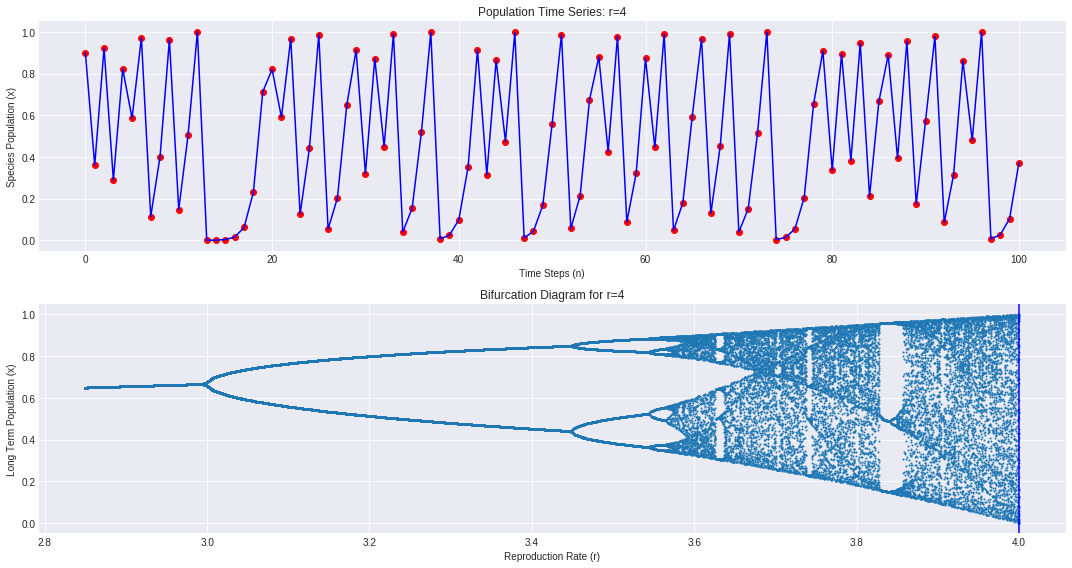

In [16]:
#@title Reproduction Rate r=4:
# Import necessary packages for computing and graphing the
# Logistic time series and bifurcation diagram
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-darkgrid')

# Logistic Equation System Parameters #
# Control parameter of the logistic equation: r-Species Reproduction Rate 
rlogistic = 4

# Set up the initital population
xlogistic = [0.9]
# The number of iterations to generate (time steps)
N = 100

# The main loop that calculates the logistic equation,
# iterates and stores population values for the total number of 
# time steps N.
for n in range(0,N):
  # At each iteration calculate the next population value x_(n+1)
  # and store it in the list x
  logisticgrowth = rlogistic*xlogistic[n]*(1.0-xlogistic[n])
  xlogistic.append(logisticgrowth)
    

# Let's define the logistic equation as a function and use it
# to create the bifurcation diagram we saw above    
def f(x, r):
    return r * x * (1 - x)

# Create an array that stores the Long Term behaviour of our logistic equation
ys = []
# Our parameter range r:[0,4]
#rs = np.linspace(0, 4, 2000)
rs = np.linspace(2.85, 4, 1000) # For Zoomed In Figure

# Given an initial condition, and for each value of r,
# Iterate through the map 550 times, only storing the last 50 values
# to solely focus on the end behaviour of the system
for r in rs:
    x = 0.9
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

## Generate Graphs ##
fig, axs = plt.subplots(2,1,figsize=(15, 8))

## Time Series Graph ##
axs[0].plot(xlogistic, 'ro', xlogistic , 'b')
axs[0].set_title("Population Time Series: r=" + str(rlogistic))
axs[0].set(xlabel="Time Steps (n)", ylabel="Species Population (x)")

## Bifurcation Diagram ## 
axs[1].plot(ys[:, 0], ys[:, 1],'.', markersize=2)
# Draw a vertical line at the given value of r ##
axs[1].axvline(x=rlogistic, ymin=0, ymax=1,linewidth=1.5,color='b')


axs[1].set_title("Bifurcation Diagram for r=" + str(rlogistic))
axs[1].set(xlabel="Reproduction Rate (r)", ylabel="Long Term Population (x)")
    
plt.tight_layout()
    
    


The graph generated shows our population dynamics given the highest reproduction rate possible in our model. As we can see, there is little underlying structure in the population dynamics and behaves completely chaotic. Instead of the discrete fixed points we saw earlier, our bifurcation diagram is marked with points, meaning that the species population may take any value in that range. If you are reading this in Google Colab's playground mode, I invite you to change our initial population value (which we have kept at  $x_{0} = 0.9$ for the entire exercise) to confirm that even the smallest change in the initial population (due to our limited numerical accuracy) of the species will yield completely different results over time. This sensitive dependence on initial conditions is one of the main characteristics of chaos and is often the underlying issue when trying to make long-term prediction of physical systems such as the weather, the stock market, and road traffic, which are extremely chaotic systems. This is the case even though these systems follow the laws of physics and thus are deterministic in nature and have a unique spatiotemporal evolution, with no random elements involved. Deterministic chaos was summarized elegantly by the famous American mathematician and meteorologist, [Edward Lorenz](https://en.wikipedia.org/wiki/Edward_Norton_Lorenz): 

"Chaos: When the present determines the future, but the approximate present does not approximately determine the future."

My goal in part two of this notebook is to show you how modern techniques from the new and exciting field of chaos control are being applied to supress chaotic systems. [The first experimental control](https://science.sciencemag.org/content/257/5074/1230) in a biological system was performed to stabilize arrhythmic behaviour in rabbit hearts by using a feedback-control mechanism. There now exist defibrillators which can monitor the heart and deliver small electrical impulses to supress fibrillation and bring heartbeat to normality. The method of chaos control by periodic proportional pulses will be demonstrated in my next article. 

However, as I write this in beautiful Queretaro, Mexico, I am very tempted to dive back into our discussion of chaos in the logistic equation. I hope you noticed how within the chaotic parameter regime $3.57< r < 4.0$, there are slim regions where there are white stripes. This brings me to talk to you about *the edge of chaos*. 

# Islands of Stability

"Chaos is born from order. \\
Cowardice is born from bravery. \\
Weakness is born from strength. \\
Order and chaos are a matter of counting. " \\
(Chapter 5)

Sun Tzu - The Art of War \\
5th Century BC

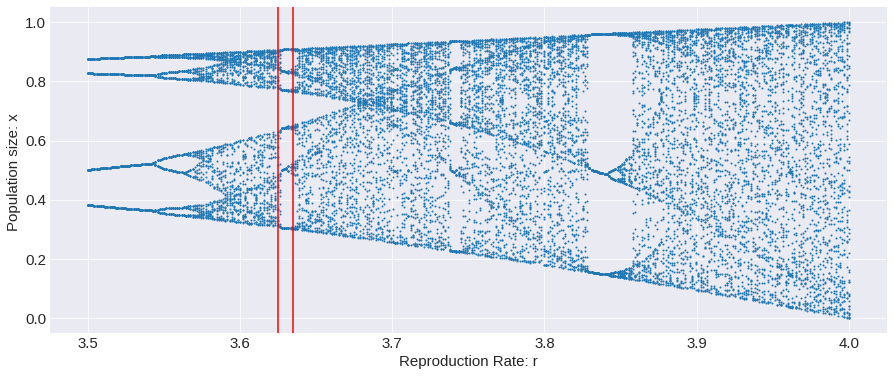

In [30]:
#@title <h1><center>Islands of Stability in Chaos</center></h1>
import numpy as np
#Plot Styles
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-darkgrid')

def f(x, r):
    return r * x * (1 - x)

ys = []
#rs = np.linspace(0, 4, 2000)
rs = np.linspace(3.5, 4, 350) # For Zoomed In Figure
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(ys[:, 0], ys[:, 1],'.', markersize=2)
#Vertical Lines, will come in handy in a bit
plt.axvline(x=3.625,color='r')
plt.axvline(x=3.635, ymin=0, ymax=1,linewidth=1.5,color='r')

plt.xlabel('Reproduction Rate: r', fontsize=15)
plt.ylabel('Population size: x ', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()



Notice that to the left of $r \approx 6.25$ our parameter lies within a chaotic regime. Where the population of the system can take on all values marked by the dots in the graph. However, all of a sudden the chaos stops and fixed points emerge! These regions are what we call *islands of stability*. What is extremely bewildering, is that if we zoom in on this region, we will be able to see that these are the exact same period doubling cascades we saw earlier! Let's take a look:

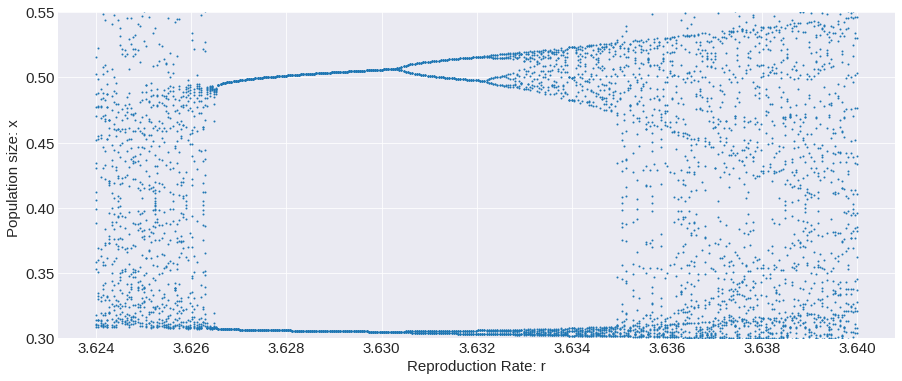

In [35]:
#@title <h1><center>Islands of Stability in Chaos</center></h1>
import numpy as np
#Plot Styles
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-darkgrid')

def f(x, r):
    return r * x * (1 - x)

ys = []
#rs = np.linspace(0, 4, 2000)
rs = np.linspace(3.624, 3.64, 350) # For Zoomed In Figure
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(ys[:, 0], ys[:, 1],'.', markersize=2)
plt.ylim(ymax = 0.55, ymin = 0.3)
#Vertical Lines, will come in handy in a bit
#plt.axvline(x=3.625,color='r')
#plt.axvline(x=3.635, ymin=0, ymax=1,linewidth=1.5,color='r')

plt.xlabel('Reproduction Rate: r', fontsize=15)
plt.ylabel('Population size: x ', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()



As we zoomed into the parameter range $3.624 < r < 3.64$ we saw that chaos stopped and fixed points emerged once again. Revealing the exact same period doubling cascades we studied earlier. What is truly amazing is that we can keep zooming into these regions and keep finding the exact same behaviour again, and again, and again... This property is what we call *self-similarity*, [where an object is exactly or approximately similar to a part of itself.](https://en.wikipedia.org/wiki/Self-similarity) Many objects in nature such as coastlines, ferns, snowflakes, peackock feathers, leaves, brain neurons, galaxies, hurricanes, lightning, mountains, nautilus shells, human lungs, clouds, are self-similar and display a special mathematical property called [*fractal*](https://en.wikipedia.org/wiki/Fractal). I find it **extremely** interesting that the graphs of equations that describe self-similar systems are themselves self-similar.